In [1]:
import pywt
import numpy as np
import matplotlib.pyplot as plt

Loading the datasets.

In [2]:
data_auau = np.load('dataset_TipAu_Au.npz')
data_ausio2 = np.load('dataset_TipAu_SiO2.npz')
data_ligcl = np.load('dataset_TipLig_CL.npz')
data_ligsio2 = np.load('dataset_TipLig_SiO2.npz')

Plotting the curves.

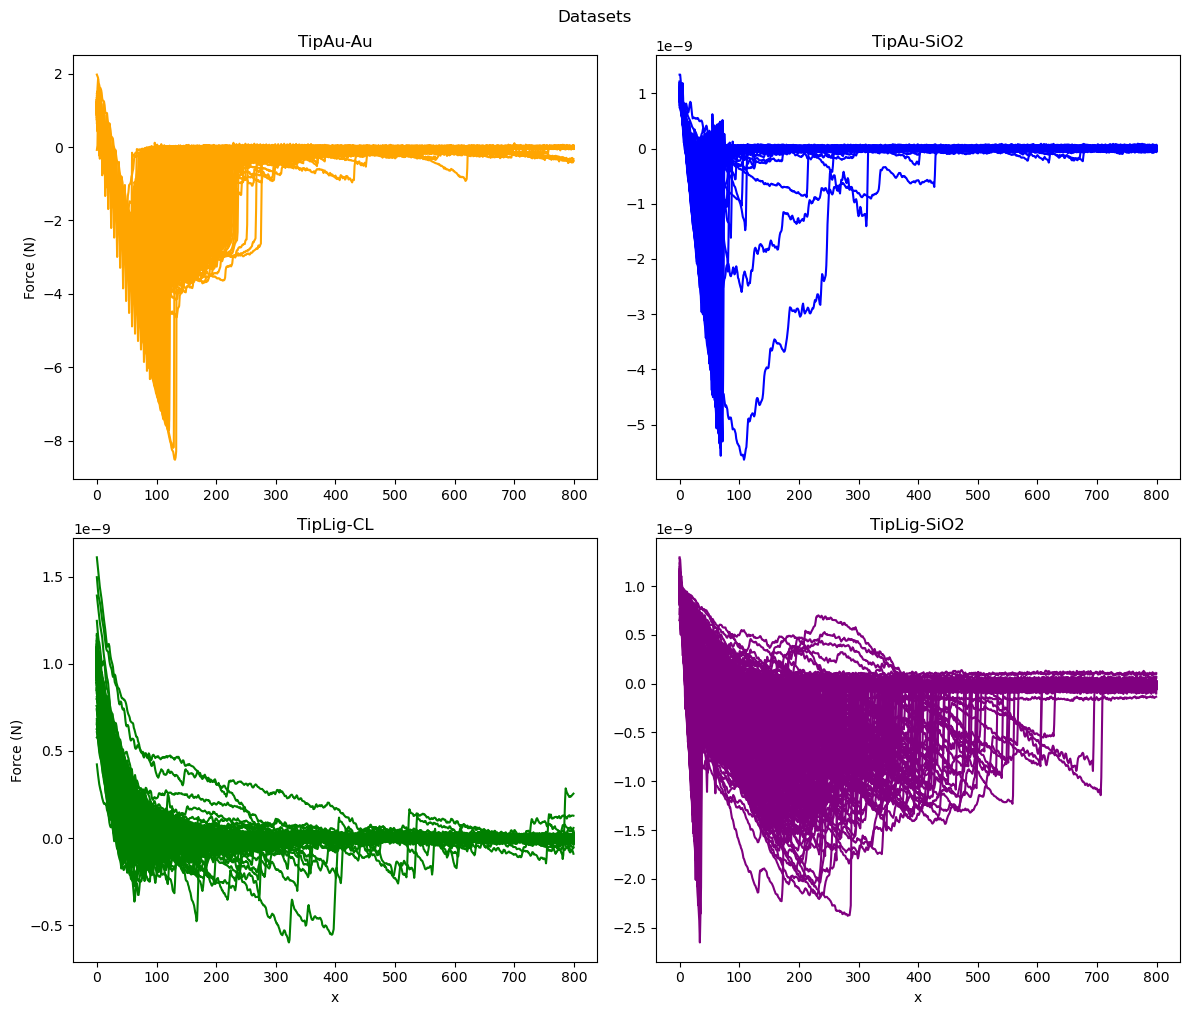

In [3]:
curves_auau = data_auau['vDeflection_N']
curves_ausio2 = data_ausio2['vDeflection_N']
curves_ligcl = data_ligcl['vDeflection_N']
curves_ligsio2 = data_ligsio2['vDeflection_N']

fig, axs = plt.subplots(2, 2, figsize=(12, 10))

for curve in curves_auau:
    axs[0, 0].plot(curve, c='orange')
axs[0, 0].set_title('TipAu-Au')
axs[0, 0].set_ylabel('Force (N)')

for curve in curves_ausio2:
    axs[0, 1].plot(curve, c='blue')
axs[0, 1].set_title('TipAu-SiO2')

for curve in curves_ligcl:
    axs[1, 0].plot(curve, c='green')
axs[1, 0].set_title('TipLig-CL')
axs[1, 0].set_xlabel('x')
axs[1, 0].set_ylabel('Force (N)')

for curve in curves_ligsio2:
    axs[1, 1].plot(curve, c='purple')
axs[1, 1].set_title('TipLig-SiO2')
axs[1, 1].set_xlabel('x')

plt.tight_layout()
plt.suptitle('Datasets', y=1.01)
plt.show()

For the next couple of analysis, the Continuous Wavelet Transform (CWT) is going to be used.

In [4]:
try:
    wavelets_auau = np.load('tipAu_Au_morl.npz')['wavelets']
    wavelets_ausio2 = np.load('tipAu_SiO2_morl.npz')['wavelets']
    wavelets_ligcl = np.load('tipLig_CL_morl.npz')['wavelets']
    wavelets_ligsio2 = np.load('tipLig_SiO2_morl.npz')['wavelets']

except:
    scales = np.arange(1, 128)
    wavelet = pywt.ContinuousWavelet('morl')
    
    num_idx = 1024
    wavelets = []
    
    for idx in range(num_idx):
        coef, freqs = pywt.cwt(curves_auau[idx], scales, wavelet)
        wavelets.append(np.abs(coef))
    
    wavelets = np.array(wavelets)
    np.savez('tipAu_Au_morl.npz', wavelets=wavelets)
    print('Saved.')

    wavelets = []
    
    for idx in range(num_idx):
        coef, freqs = pywt.cwt(curves_ausio2[idx], scales, wavelet)
        wavelets.append(np.abs(coef))
    
    wavelets = np.array(wavelets)
    np.savez('tipAu_SiO2_morl.npz', wavelets=wavelets)
    print('Saved.')

    wavelets = []
    
    for idx in range(num_idx):
        coef, freqs = pywt.cwt(curves_ligcl[idx], scales, wavelet)
        wavelets.append(np.abs(coef))
    
    wavelets = np.array(wavelets)
    np.savez('tipLig_CL_morl.npz', wavelets=wavelets)
    print('Saved.')

    wavelets = []
    
    for idx in range(num_idx):
        coef, freqs = pywt.cwt(curves_ligsio2[idx], scales, wavelet)
        wavelets.append(np.abs(coef))
    
    wavelets = np.array(wavelets)
    np.savez('tipLig_SiO2_morl.npz', wavelets=wavelets)
    print('Saved.')

## PCA visualization

In [5]:
from sklearn.decomposition import PCA

To better explore the datasets, the wavelets and the force curves will be reduced in dimensionality via Principal Component Analysis (PCA). Plotting the wavelets.

In [6]:
try:
    data_auau = np.load('dataset_TipAu_Au.npz')['vDeflection_N']
    data_ausio2 = np.load('dataset_TipAu_SiO2.npz')['vDeflection_N']
    data_ligcl = np.load('dataset_TipLig_CL.npz')['vDeflection_N']
    data_ligsio2 = np.load('dataset_TipLig_SiO2.npz')['vDeflection_N']
    wavelets_auau = np.load('tipAu_Au_morl.npz')['wavelets']
    wavelets_ausio2 = np.load('tipAu_SiO2_morl.npz')['wavelets']
    wavelets_ligcl = np.load('tipLig_CL_morl.npz')['wavelets']
    wavelets_ligsio2 = np.load('tipLig_SiO2_morl.npz')['wavelets']
except:
    print('Wavelets not found.')

In [7]:
wavelets_auau_flatten = np.array([w.ravel() for w in wavelets_auau])
wavelets_ausio2_flatten = np.array([w.ravel() for w in wavelets_ausio2])
wavelets_ligcl_flatten = np.array([w.ravel() for w in wavelets_ligcl])
wavelets_ligsio2_flatten = np.array([w.ravel() for w in wavelets_ligsio2])

pca = PCA(n_components=2)  
wavelets_auau_pca = pca.fit_transform(wavelets_auau_flatten)
wavelets_ausio2_pca = pca.fit_transform(wavelets_ausio2_flatten)
wavelets_ligcl_pca = pca.fit_transform(wavelets_ligcl_flatten)
wavelets_ligsio2_pca = pca.fit_transform(wavelets_ligsio2_flatten)

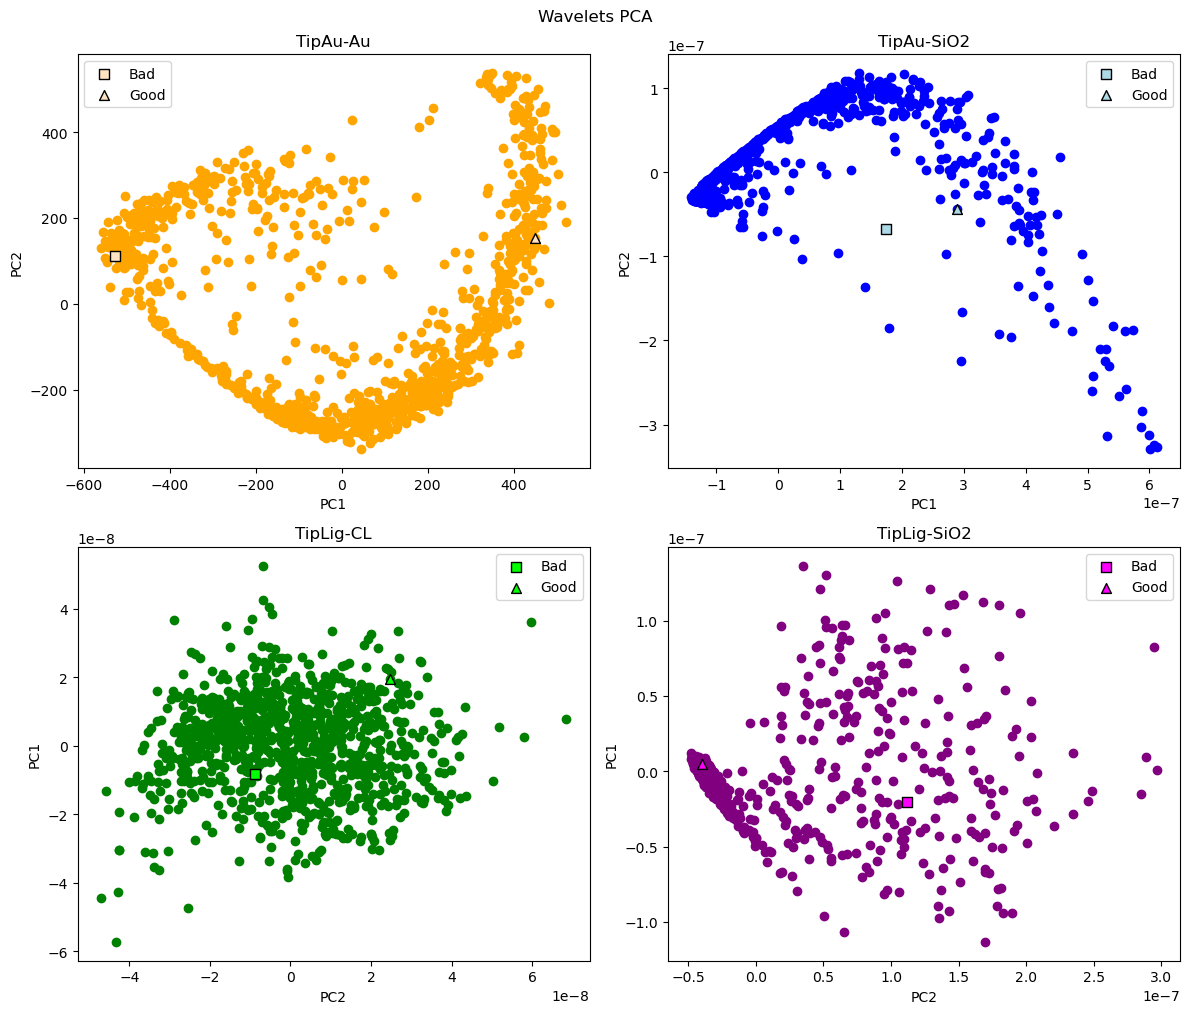

In [8]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

axs[0, 0].scatter(wavelets_auau_pca[:, 0], wavelets_auau_pca[:, 1], c='orange')
axs[0, 0].scatter(wavelets_auau_pca[47, 0], wavelets_auau_pca[47, 1], marker='s', s=50., c='bisque', edgecolor='k', label='Bad')
axs[0, 0].scatter(wavelets_auau_pca[7, 0], wavelets_auau_pca[7, 1], marker='^', s=50., c='bisque', edgecolor='k', label='Good')
axs[0, 0].set_title('TipAu-Au')
axs[0, 0].legend()
axs[0, 0].set_ylabel('PC2')
axs[0, 0].set_xlabel('PC1')

axs[0, 1].scatter(wavelets_ausio2_pca[:, 0], wavelets_ausio2_pca[:, 1], c='blue')
axs[0, 1].scatter(wavelets_ausio2_pca[15, 0], wavelets_ausio2_pca[15, 1], marker='s', s=50., c='lightblue', edgecolor='k', label='Bad')
axs[0, 1].scatter(wavelets_ausio2_pca[0, 0], wavelets_ausio2_pca[0, 1], marker='^', s=50., c='lightblue', edgecolor='k', label='Good')
axs[0, 1].set_title('TipAu-SiO2')
axs[0, 1].legend()
axs[0, 1].set_ylabel('PC2')
axs[0, 1].set_xlabel('PC1')

axs[1, 0].scatter(wavelets_ligcl_pca[:, 0], wavelets_ligcl_pca[:, 1], c='green')
axs[1, 0].scatter(wavelets_ligcl_pca[7, 0], wavelets_ligcl_pca[7, 1], marker='s', s=50., c='lime', edgecolor='k', label='Bad')
axs[1, 0].scatter(wavelets_ligcl_pca[17, 0], wavelets_ligcl_pca[17, 1], marker='^', s=50., c='lime', edgecolor='k', label='Good')
axs[1, 0].set_title('TipLig-CL')
axs[1, 0].legend()
axs[1, 0].set_xlabel('PC2')
axs[1, 0].set_ylabel('PC1')

axs[1, 1].scatter(wavelets_ligsio2_pca[:, 0], wavelets_ligsio2_pca[:, 1], c='purple')
axs[1, 1].scatter(wavelets_ligsio2_pca[1, 0], wavelets_ligsio2_pca[1, 1], marker='s', s=50., c='magenta', edgecolor='k', label='Bad')
axs[1, 1].scatter(wavelets_ligsio2_pca[17, 0], wavelets_ligsio2_pca[17, 1], marker='^', s=50., c='magenta', edgecolor='k', label='Good')
axs[1, 1].set_title('TipLig-SiO2')
axs[1, 1].legend()
axs[1, 1].set_xlabel('PC2')
axs[1, 1].set_ylabel('PC1')

plt.tight_layout()
plt.suptitle('Wavelets PCA', y=1.01)
plt.show()

Doing the same for the force curves.

In [9]:
data_auau_flatten = np.array([c.ravel() for c in data_auau])
data_ausio2_flatten = np.array([c.ravel() for c in data_ausio2])
data_ligcl_flatten = np.array([c.ravel() for c in data_ligcl])
data_ligsio2_flatten = np.array([c.ravel() for c in data_ligsio2])

pca = PCA(n_components=2)  
data_auau_pca = pca.fit_transform(data_auau_flatten)
data_ausio2_pca = pca.fit_transform(data_ausio2_flatten)
data_ligcl_pca = pca.fit_transform(data_ligcl_flatten)
data_ligsio2_pca = pca.fit_transform(data_ligsio2_flatten)

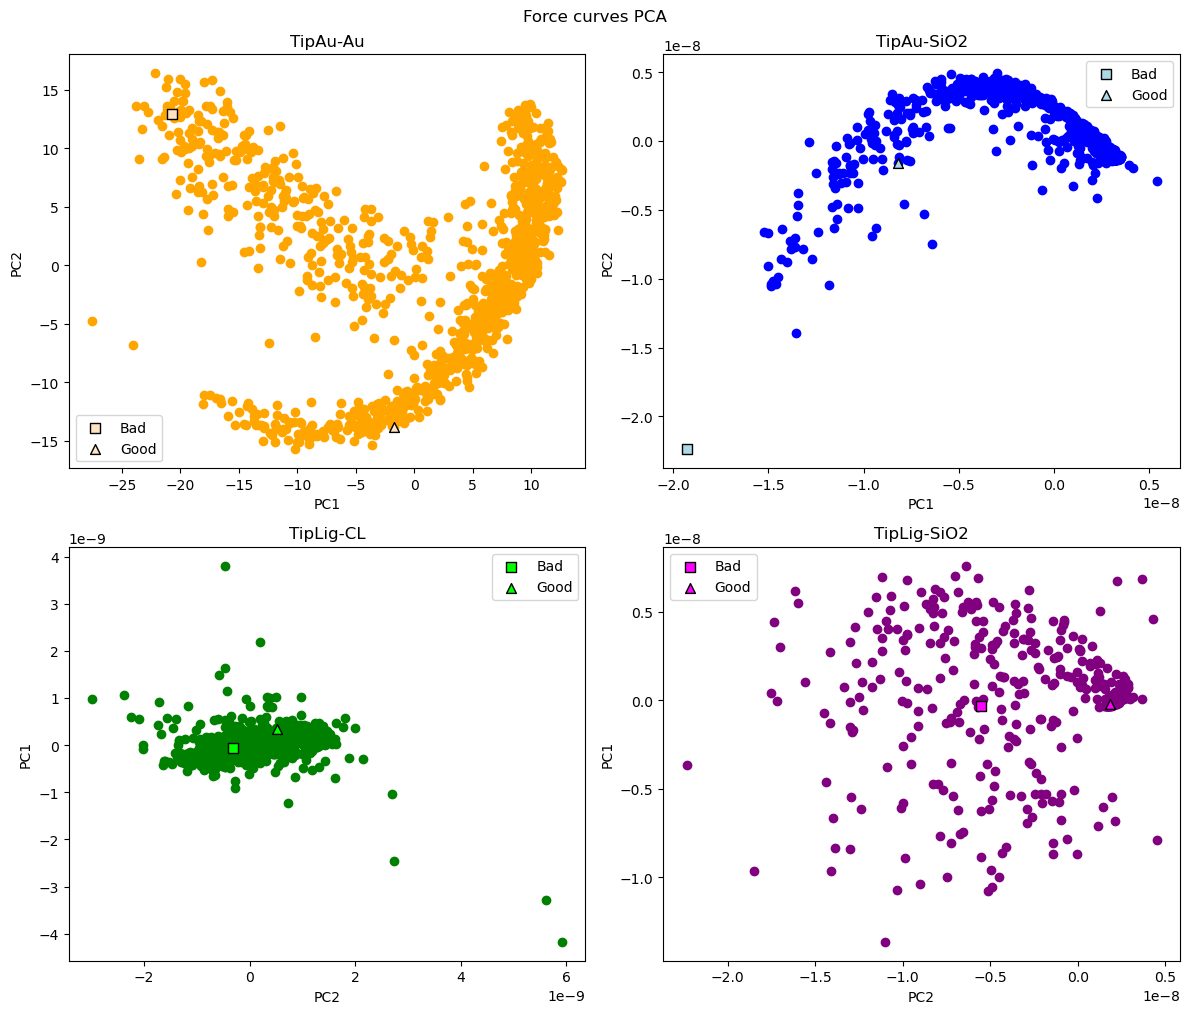

In [10]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

axs[0, 0].scatter(data_auau_pca[:, 0], data_auau_pca[:, 1], c='orange')
axs[0, 0].scatter(data_auau_pca[47, 0], data_auau_pca[47, 1], marker='s', s=50., c='bisque', edgecolor='k', label='Bad')
axs[0, 0].scatter(data_auau_pca[7, 0], data_auau_pca[7, 1], marker='^', s=50., c='bisque', edgecolor='k', label='Good')
axs[0, 0].set_title('TipAu-Au')
axs[0, 0].legend()
axs[0, 0].set_ylabel('PC2')
axs[0, 0].set_xlabel('PC1')

axs[0, 1].scatter(data_ausio2_pca[:, 0], data_ausio2_pca[:, 1], c='blue')
axs[0, 1].scatter(data_ausio2_pca[15, 0], data_ausio2_pca[15, 1], marker='s', s=50., c='lightblue', edgecolor='k', label='Bad')
axs[0, 1].scatter(data_ausio2_pca[0, 0], data_ausio2_pca[0, 1], marker='^', s=50., c='lightblue', edgecolor='k', label='Good')
axs[0, 1].set_title('TipAu-SiO2')
axs[0, 1].legend()
axs[0, 1].set_ylabel('PC2')
axs[0, 1].set_xlabel('PC1')

axs[1, 0].scatter(data_ligcl_pca[:, 0], data_ligcl_pca[:, 1], c='green')
axs[1, 0].scatter(data_ligcl_pca[7, 0], data_ligcl_pca[7, 1], marker='s', s=50., c='lime', edgecolor='k', label='Bad')
axs[1, 0].scatter(data_ligcl_pca[17, 0], data_ligcl_pca[17, 1], marker='^', s=50., c='lime', edgecolor='k', label='Good')
axs[1, 0].set_title('TipLig-CL')
axs[1, 0].legend()
axs[1, 0].set_xlabel('PC2')
axs[1, 0].set_ylabel('PC1')

axs[1, 1].scatter(data_ligsio2_pca[:, 0], data_ligsio2_pca[:, 1], c='purple')
axs[1, 1].scatter(data_ligsio2_pca[1, 0], data_ligsio2_pca[1, 1], marker='s', s=50., c='magenta', edgecolor='k', label='Bad')
axs[1, 1].scatter(data_ligsio2_pca[17, 0], data_ligsio2_pca[17, 1], marker='^', s=50., c='magenta', edgecolor='k', label='Good')
axs[1, 1].set_title('TipLig-SiO2')
axs[1, 1].legend()
axs[1, 1].set_xlabel('PC2')
axs[1, 1].set_ylabel('PC1')

plt.tight_layout()
plt.suptitle('Force curves PCA', y=1.01)
plt.show()

## t-SNE visualization

In [11]:
from sklearn.manifold import TSNE

Visualizing the data with t-distributed Stochastic Neighbor Embedding (t-SNE).

In [12]:
tsne = TSNE(n_components=2)  
wavelets_auau_tsne = tsne.fit_transform(wavelets_auau_flatten)
wavelets_ausio2_tsne = tsne.fit_transform(wavelets_ausio2_flatten)
wavelets_ligcl_tsne = tsne.fit_transform(wavelets_ligcl_flatten)
wavelets_ligsio2_tsne = tsne.fit_transform(wavelets_ligsio2_flatten)

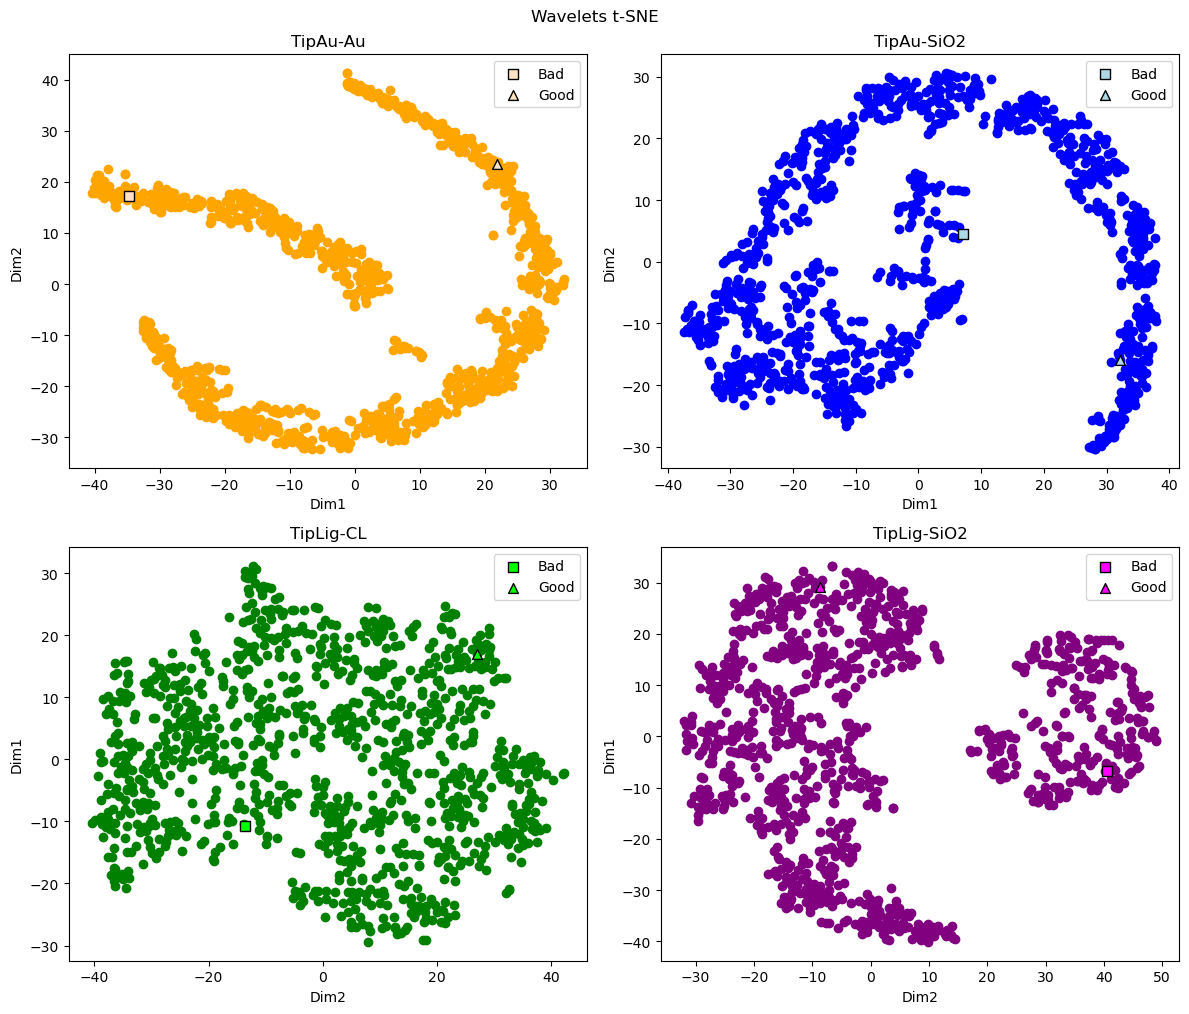

In [13]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

axs[0, 0].scatter(wavelets_auau_tsne[:, 0], wavelets_auau_tsne[:, 1], c='orange')
axs[0, 0].scatter(wavelets_auau_tsne[47, 0], wavelets_auau_tsne[47, 1], marker='s', s=50., c='bisque', edgecolor='k', label='Bad')
axs[0, 0].scatter(wavelets_auau_tsne[7, 0], wavelets_auau_tsne[7, 1], marker='^', s=50., c='bisque', edgecolor='k', label='Good')
axs[0, 0].set_title('TipAu-Au')
axs[0, 0].legend()
axs[0, 0].set_ylabel('Dim2')
axs[0, 0].set_xlabel('Dim1')

axs[0, 1].scatter(wavelets_ausio2_tsne[:, 0], wavelets_ausio2_tsne[:, 1], c='blue')
axs[0, 1].scatter(wavelets_ausio2_tsne[15, 0], wavelets_ausio2_tsne[15, 1], marker='s', s=50., c='lightblue', edgecolor='k', label='Bad')
axs[0, 1].scatter(wavelets_ausio2_tsne[0, 0], wavelets_ausio2_tsne[0, 1], marker='^', s=50., c='lightblue', edgecolor='k', label='Good')
axs[0, 1].set_title('TipAu-SiO2')
axs[0, 1].legend()
axs[0, 1].set_ylabel('Dim2')
axs[0, 1].set_xlabel('Dim1')

axs[1, 0].scatter(wavelets_ligcl_tsne[:, 0], wavelets_ligcl_tsne[:, 1], c='green')
axs[1, 0].scatter(wavelets_ligcl_tsne[7, 0], wavelets_ligcl_tsne[7, 1], marker='s', s=50., c='lime', edgecolor='k', label='Bad')
axs[1, 0].scatter(wavelets_ligcl_tsne[17, 0], wavelets_ligcl_tsne[17, 1], marker='^', s=50., c='lime', edgecolor='k', label='Good')
axs[1, 0].set_title('TipLig-CL')
axs[1, 0].legend()
axs[1, 0].set_xlabel('Dim2')
axs[1, 0].set_ylabel('Dim1')

axs[1, 1].scatter(wavelets_ligsio2_tsne[:, 0], wavelets_ligsio2_tsne[:, 1], c='purple')
axs[1, 1].scatter(wavelets_ligsio2_tsne[1, 0], wavelets_ligsio2_tsne[1, 1], marker='s', s=50., c='magenta', edgecolor='k', label='Bad')
axs[1, 1].scatter(wavelets_ligsio2_tsne[17, 0], wavelets_ligsio2_tsne[17, 1], marker='^', s=50., c='magenta', edgecolor='k', label='Good')
axs[1, 1].set_title('TipLig-SiO2')
axs[1, 1].legend()
axs[1, 1].set_xlabel('Dim2')
axs[1, 1].set_ylabel('Dim1')

plt.tight_layout()
plt.suptitle('Wavelets t-SNE', y=1.01)
plt.show()

Doing the same for the force curves.

In [14]:
tsne = TSNE(n_components=2)  
data_auau_tsne = tsne.fit_transform(data_auau_flatten)
data_ausio2_tsne = tsne.fit_transform(data_ausio2_flatten)
data_ligcl_tsne = tsne.fit_transform(data_ligcl_flatten)
data_ligsio2_tsne = tsne.fit_transform(data_ligsio2_flatten)

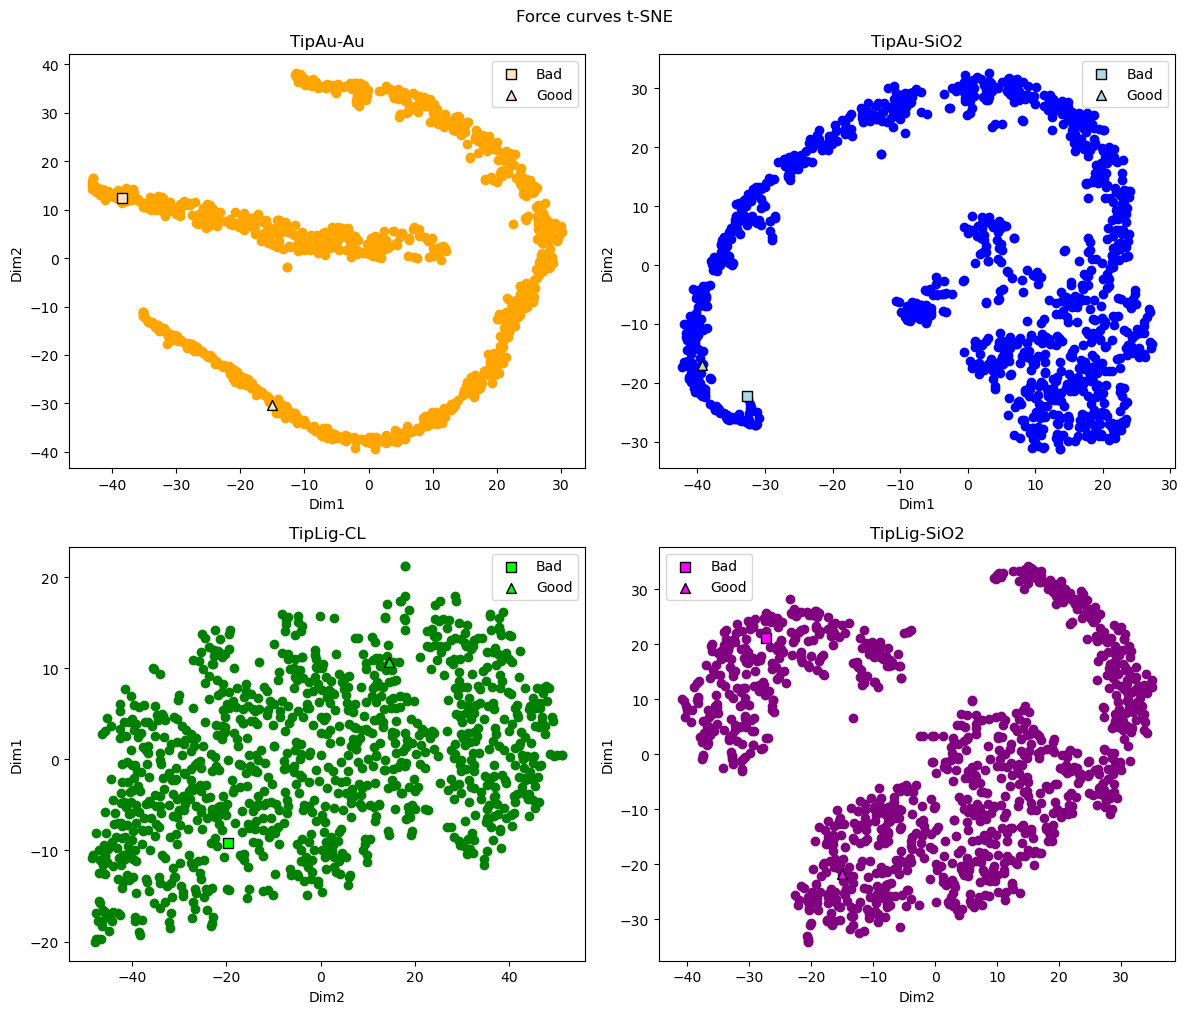

In [15]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

axs[0, 0].scatter(data_auau_tsne[:, 0], data_auau_tsne[:, 1], c='orange')
axs[0, 0].scatter(data_auau_tsne[47, 0], data_auau_tsne[47, 1], marker='s', s=50., c='bisque', edgecolor='k', label='Bad')
axs[0, 0].scatter(data_auau_tsne[7, 0], data_auau_tsne[7, 1], marker='^', s=50., c='bisque', edgecolor='k', label='Good')
axs[0, 0].set_title('TipAu-Au')
axs[0, 0].legend()
axs[0, 0].set_ylabel('Dim2')
axs[0, 0].set_xlabel('Dim1')

axs[0, 1].scatter(data_ausio2_tsne[:, 0], data_ausio2_tsne[:, 1], c='blue')
axs[0, 1].scatter(data_ausio2_tsne[15, 0], data_ausio2_tsne[15, 1], marker='s', s=50., c='lightblue', edgecolor='k', label='Bad')
axs[0, 1].scatter(data_ausio2_tsne[0, 0], data_ausio2_tsne[0, 1], marker='^', s=50., c='lightblue', edgecolor='k', label='Good')
axs[0, 1].set_title('TipAu-SiO2')
axs[0, 1].legend()
axs[0, 1].set_ylabel('Dim2')
axs[0, 1].set_xlabel('Dim1')

axs[1, 0].scatter(data_ligcl_tsne[:, 0], data_ligcl_tsne[:, 1], c='green')
axs[1, 0].scatter(data_ligcl_tsne[7, 0], data_ligcl_tsne[7, 1], marker='s', s=50., c='lime', edgecolor='k', label='Bad')
axs[1, 0].scatter(data_ligcl_tsne[17, 0], data_ligcl_tsne[17, 1], marker='^', s=50., c='lime', edgecolor='k', label='Good')
axs[1, 0].set_title('TipLig-CL')
axs[1, 0].legend()
axs[1, 0].set_xlabel('Dim2')
axs[1, 0].set_ylabel('Dim1')

axs[1, 1].scatter(data_ligsio2_tsne[:, 0], data_ligsio2_tsne[:, 1], c='purple')
axs[1, 1].scatter(data_ligsio2_tsne[1, 0], data_ligsio2_tsne[1, 1], marker='s', s=50., c='magenta', edgecolor='k', label='Bad')
axs[1, 1].scatter(data_ligsio2_tsne[17, 0], data_ligsio2_tsne[17, 1], marker='^', s=50., c='magenta', edgecolor='k', label='Good')
axs[1, 1].set_title('TipLig-SiO2')
axs[1, 1].legend()
axs[1, 1].set_xlabel('Dim2')
axs[1, 1].set_ylabel('Dim1')

plt.tight_layout()
plt.suptitle('Force curves t-SNE', y=1.01)
plt.show()